<a href="https://colab.research.google.com/github/maricmenezes/PLN-exerc-cio/blob/main/Trabalho%20Pr%C3%A1tico%20PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#Descompactação do Corpus

!wget -P '/content/drive/MyDrive/MBA/NLP' 'http://nilc.icmc.usp.br/macmorpho/macmorpho-v3.tgz'
!tar -xvf '/content/drive/MyDrive/MBA/NLP/macmorpho-v3.tgz' -C '/content/drive/MyDrive/MBA/NLP'

--2021-07-09 22:26:53--  http://nilc.icmc.usp.br/macmorpho/macmorpho-v3.tgz
Resolving nilc.icmc.usp.br (nilc.icmc.usp.br)... 143.107.183.225
Connecting to nilc.icmc.usp.br (nilc.icmc.usp.br)|143.107.183.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2463485 (2.3M) [application/x-gzip]
Saving to: ‘/content/drive/MyDrive/MBA/NLP/macmorpho-v3.tgz.1’

macmorpho-v3.tgz.1  100%[===================>]   2.35M   542KB/s    in 7.1s    

2021-07-09 22:27:01 (340 KB/s) - ‘/content/drive/MyDrive/MBA/NLP/macmorpho-v3.tgz.1’ saved [2463485/2463485]

macmorpho-dev.txt
macmorpho-test.txt
macmorpho-train.txt


In [51]:
#Bibliotecas utilizadas

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stopwords_pt = nltk.corpus.stopwords.words('portuguese')
from nltk.stem import WordNetLemmatizer

from nltk.corpus import wordnet
nltk.download('wordnet')

import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [66]:
def Leitura_Texto(path):
  with open(path) as f:
    texto = f.read()


    df = pd.DataFrame(re.split(r' |\n', texto))
  df.columns = ['Texto']
  if len(df[df['Texto'] == '']) > 0:
    idx = df[df['Texto'] == ''].index
    df.drop(idx, axis = 0, inplace = True)
  df['Caracter'] = df['Texto'].apply(lambda txt: Separador_Texto(txt, posicao=0).lower())
  df['Tipo'] = df['Texto'].apply(lambda txt: Separador_Texto(txt, posicao=1))
  return texto, df

def Separador_Texto(texto, separador = '_', posicao = 0):
  return texto.split(sep = separador)[posicao]

In [90]:
path_dev = '/content/drive/MyDrive/MBA/NLP/macmorpho-dev.txt'
texto_dev, df_dev = Leitura_Texto(path_dev)
print('Exemplo:', texto_dev[:100])
df_dev.head()


path_train = '/content/drive/MyDrive/MBA/NLP/macmorpho-train.txt'
texto_train, df_train = Leitura_Texto(path_train)
print('Exemplo:', texto_train[:100])
df_train.head()


path_test = '/content/drive/MyDrive/MBA/NLP/macmorpho-test.txt'
texto_test, df_test = Leitura_Texto(path_test)
print('Exemplo:', texto_test[:100])
df_test.head()

Exemplo: Ainda_ADV em_PREP dezembro_N de_PREP 1990_N ,_PU foi_V editada_PCP a_ART famosa_ADJ 289_N ,_PU que_P
Exemplo: Jersei_N atinge_V média_N de_PREP Cr$_CUR 1,4_NUM milhão_N na_PREP+ART venda_N da_PREP+ART Pinhal_NP
Exemplo: Salto_N sete_ADJ
O_ART grande_ADJ assunto_N da_PREP+ART semana_N em_PREP Nova_NPROP York_NPROP é_V a


,Texto,Caracter,Tipo
0,Salto_N,salto,N
1,sete_ADJ,sete,ADJ
2,O_ART,o,ART
3,grande_ADJ,grande,ADJ
4,assunto_N,assunto,N


In [69]:
textos = [texto_dev, texto_test, texto_train]
nomes = ['Dev', 'Test', 'Train']

print('Textos')
for i, j in enumerate(textos):

  match = re.findall(r'UNK', j)
  print('\t ->', nomes[i], ':', len([s for s in match]))

Textos
	 -> Dev : 0
	 -> Test : 0
	 -> Train : 0


In [84]:
corpus_train = ' '.join([setenca for setenca in df_train['Caracter']])
corpus_train[:500]

'jersei atinge média de cr$ 1,4 milhão na venda da pinhal em são paulo . programe sua viagem à exposição nacional do zebu , que começa dia 25 . safra recorde e disponibilidade de crédito ativam vendas de máquinas agrícolas . a desertificação tornou crítica a produtividade de 52 mil km² na região . no dia 15 , dia da conservação do solo , o único fato a festejar pode ser a convenção internacional sobre desertificação . a produção brasileira de pintos de corte totalizou , em fevereiro último , 166 '

In [91]:
ptbr_sentence = nltk.data.load('tokenizers/punkt/PY3/portuguese.pickle') 
sent_lista_train = ptbr_sentence.tokenize(corpus_train)
sent_lista_train[:5]

['jersei atinge média de cr$ 1,4 milhão na venda da pinhal em são paulo .',
 'programe sua viagem à exposição nacional do zebu , que começa dia 25 .',
 'safra recorde e disponibilidade de crédito ativam vendas de máquinas agrícolas .',
 'a desertificação tornou crítica a produtividade de 52 mil km² na região .',
 'no dia 15 , dia da conservação do solo , o único fato a festejar pode ser a convenção internacional sobre desertificação .']

In [89]:
quantidade_train = [len(i.split(sep=' ')) for i in sent_lista_train]
id_max_train = np.argmax(quantidade_train)
id_min_train = np.argmin(quantidade_train)
print('Quantidade mínima de palvaras e pontos (sem espaços):', quantidade_train[id_min_train])
print('\t-> Sentença:', sent_lista_train[id_min_train])
print('Quantidade máxima de palvaras e pontos (sem espaços):', quantidade_train[id_max_train])
print('\t-> Sentença:', sent_lista_train[id_max_train])

Quantidade mínima de palvaras e pontos (sem espaços): 1
	-> Sentença: art.
Quantidade máxima de palvaras e pontos (sem espaços): 346
	-> Sentença: siciliano cr$ 25.950 romance tradicional de espionagem e suspense 21,98 urvs jovem advogado descobre negócios ilícitos na firma onde trabalha paulo coelho 14,46 urvs o livro trata do indivíduo e da necessidade de encontrar seu destino um homem caminha mais de 700 km em busca de mistérios sagrados record 13.50 urvs advogado volta ao passado , início dos 50 , enquanto vivencia um grande amor jorge amado 11,50 urvs 16,11 urvs a história de uma irlandesa que conhece a feitiçaria no século 20 25,51 urvs scott turow cr$ 17.690 thriller de tribunal , sobre ex-policial encarregado de procurar sócio de uma firma de advocacia danielle steel cr$ 13.890 caso amoroso entre autor de novela de tv e assistente de produção cr$ 9.190 o autor sai em busca de seu e acaba no deserto da califórnia john updike cr$ 11.520 alegoria sobre tristão e isolda , com algun

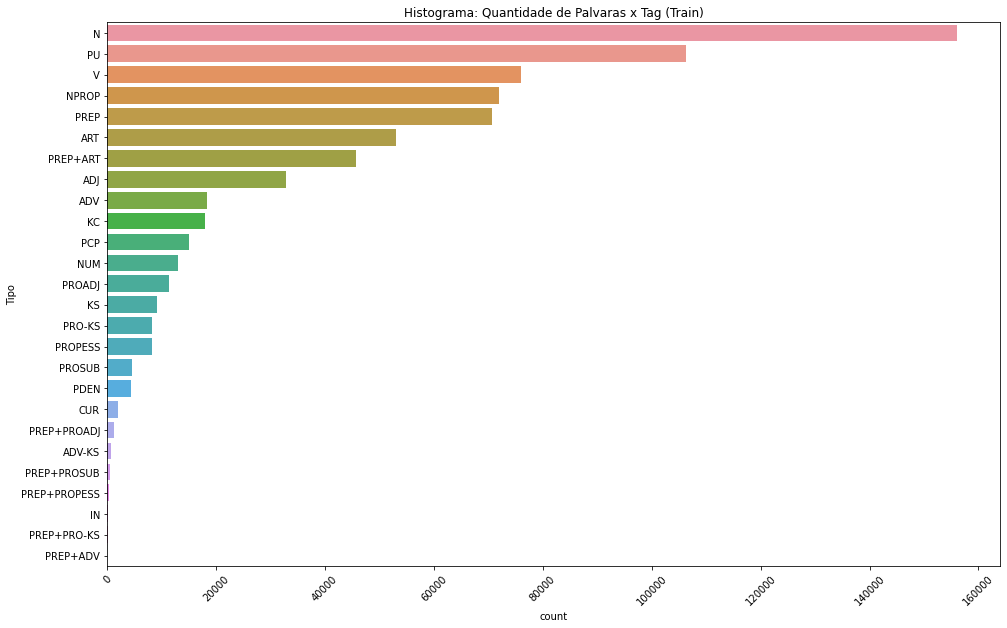

In [94]:
plt.figure(figsize = (16,10))
sns.countplot(y = 'Tipo', data = df_train, order = df_train['Tipo'].value_counts().index)
plt.title('Histograma: Quantidade de Palvaras x Tag (Train)')
plt.xticks(rotation = 45)
plt.show()

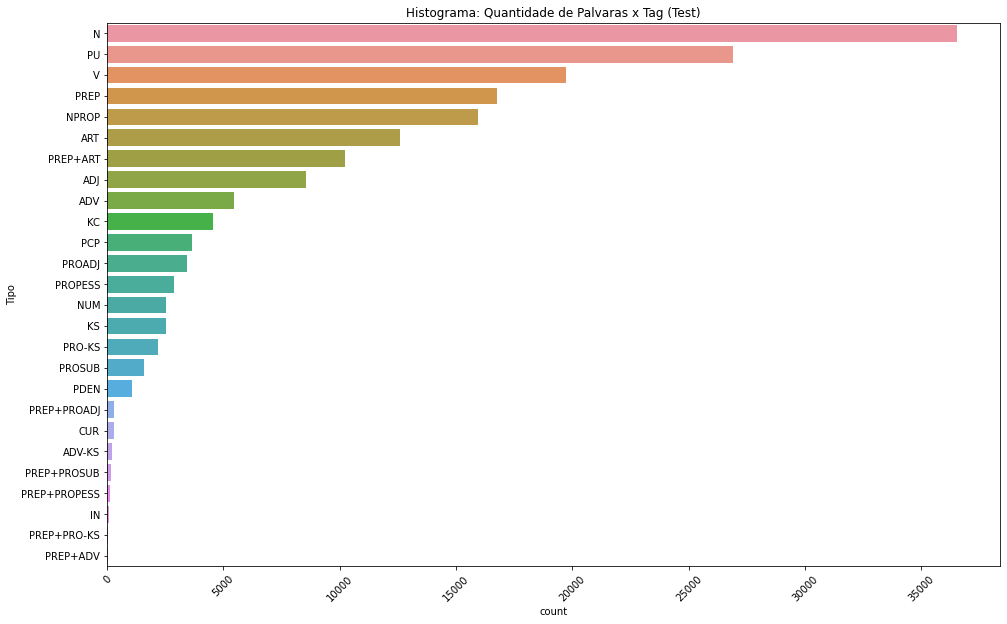

In [95]:
plt.figure(figsize = (16,10))
sns.countplot(y = 'Tipo', data = df_test, order = df_test['Tipo'].value_counts().index)
plt.title('Histograma: Quantidade de Palvaras x Tag (Test)')
plt.xticks(rotation = 45, )
plt.show()

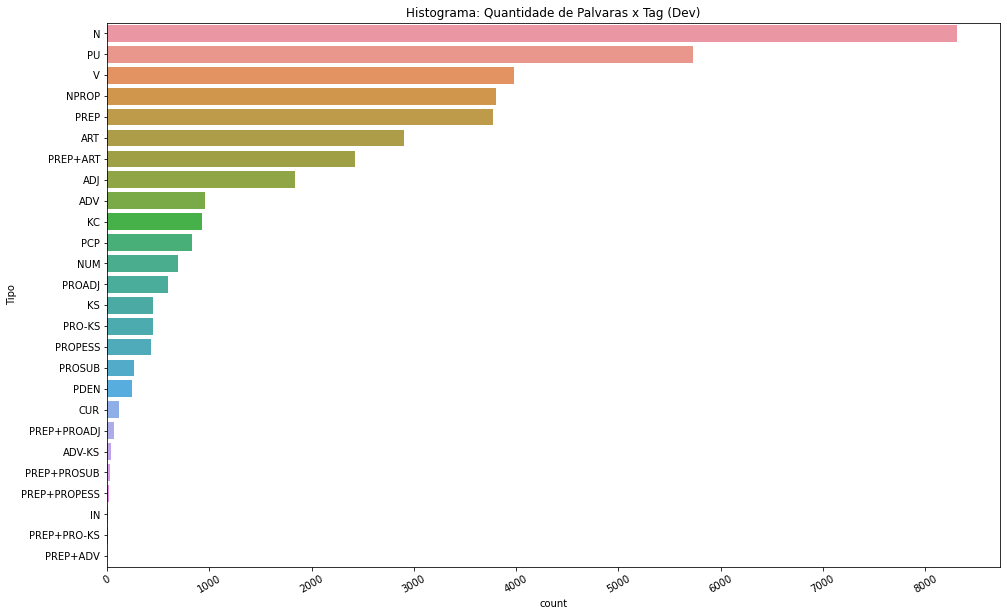

In [96]:
plt.figure(figsize = (16,10))
sns.countplot(y = 'Tipo', data = df_dev, order = df_dev['Tipo'].value_counts().index)
plt.title('Histograma: Quantidade de Palvaras x Tag (Dev)')
plt.xticks(rotation = 30, )
plt.show()

In [77]:
def Conta_Stopwords (df, coluna = 'Caracter'):
  dic = {}
  conta_cum = 0
  for word in stopwords_pt:
    conta = df.loc[df[coluna] == word, coluna].count()
    dic[word] = conta
    conta_cum =  conta_cum + conta
  return conta_cum, dic

  

In [78]:
dfs = [df_train, df_test, df_dev]
df_nomes = ['Train', 'Test', 'Dev']
top = 50
DF = []

print('Contabilização de stopwords (total):')
for i, j in enumerate(dfs):
  conta, count_stopword = Conta_Stopwords(j)
  DF.append(pd.DataFrame(count_stopword, index = [0]).T)
  print('\t->', df_nomes[i], ':', conta, '(', conta/len(j)*100, '% )')

Contabilização de stopwords (total):
	-> Train : 250941 ( 34.44640128922975 % )
	-> Test : 61933 ( 34.72106204414345 % )
	-> Dev : 13364 ( 34.371543941771044 % )


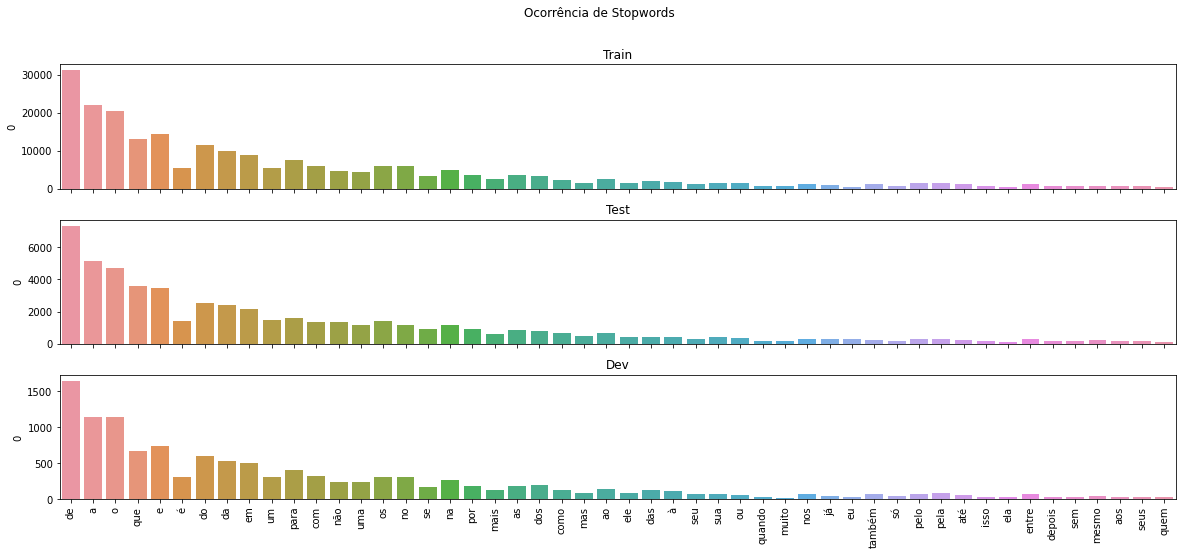

In [97]:
fig, axes = plt.subplots(3, 1, figsize=(20, 8), sharex = True)
fig.suptitle('Ocorrência de Stopwords')
fig.subplots_adjust(wspace=None, hspace=0.25)

for i in range(3):
  df = DF[i]
  sns.barplot(ax = axes[i], 
              y = 0, 
              x = df.index[:top] , 
              data = df[:top])
  axes[i].set_title(df_nomes[i])

plt.xticks(rotation=90)
plt.show()